# 1.Data Preparetion

In [88]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, classification_report

In [89]:
df = pd.read_csv("D:\Programing\.vscode\Python\Project\ecommerce_sales_analysis.csv")
df.head(20)

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257
5,6,Product_6,Toys,82.22,3.6,270,834,288,38,422,329,245,614,979,851,630,738,485
6,7,Product_7,Electronics,33.75,3.8,632,565,140,539,244,188,700,896,965,447,66,32,516
7,8,Product_8,Electronics,433.76,4.4,906,905,83,48,926,94,555,280,102,202,753,376,445
8,9,Product_9,Electronics,302.55,2.0,848,809,693,419,106,616,85,42,992,696,298,213,708
9,10,Product_10,Clothing,355.50,3.0,400,319,390,636,87,7,555,485,566,632,462,561,179


# 1.1. Convert prices to USD

In [90]:

df['price'] = (df['price'] * 0.012).round(2)  # Rupi to USD

In [91]:
df.head(20)

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,2.28,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,5.71,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,4.41,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,3.62,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,0.99,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257
5,6,Product_6,Toys,0.99,3.6,270,834,288,38,422,329,245,614,979,851,630,738,485
6,7,Product_7,Electronics,0.40,3.8,632,565,140,539,244,188,700,896,965,447,66,32,516
7,8,Product_8,Electronics,5.21,4.4,906,905,83,48,926,94,555,280,102,202,753,376,445
8,9,Product_9,Electronics,3.63,2.0,848,809,693,419,106,616,85,42,992,696,298,213,708
9,10,Product_10,Clothing,4.27,3.0,400,319,390,636,87,7,555,485,566,632,462,561,179


In [92]:
df.shape

(1000, 18)

# 2.Data Cleaning

In [93]:
df.info()   #Checking infomation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [94]:
df.duplicated()   #Finding Duplicate

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [95]:
df.isnull().sum()    #Finding missing Value

product_id        0
product_name      0
category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64

# 3. EDA

# 3.1 Basic Statistic

In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
product_id,1000.0,500.50000,288.819436,1.00,250.7500,500.50,750.2500,1000.0
price,1000.0,2.97218,1.735124,0.09,1.4625,3.01,4.4825,6.0
review_score,1000.0,3.02760,1.171243,1.00,2.0000,3.10,4.0000,5.0
review_count,1000.0,526.50600,282.269932,1.00,283.7500,543.00,772.0000,999.0
sales_month_1,1000.0,498.30600,289.941478,0.00,245.5000,507.50,740.7500,1000.0
sales_month_2,1000.0,507.66100,285.992689,2.00,262.5000,508.00,756.2500,1000.0
sales_month_3,1000.0,506.73900,294.010873,0.00,243.7500,493.00,777.2500,999.0
sales_month_4,1000.0,503.82300,286.645567,0.00,261.5000,501.50,749.5000,1000.0
sales_month_5,1000.0,487.19400,287.844324,0.00,221.0000,497.00,727.0000,1000.0
sales_month_6,1000.0,491.65300,289.234018,0.00,236.0000,479.50,740.5000,1000.0


In [97]:
df["category"].unique()

array(['Clothing', 'Home & Kitchen', 'Toys', 'Books', 'Electronics',
       'Health', 'Sports'], dtype=object)

In [98]:
df["category"].mode() 


0    Books
Name: category, dtype: object

In [99]:
df["price"].mode(all)

0    3.82
Name: price, dtype: float64

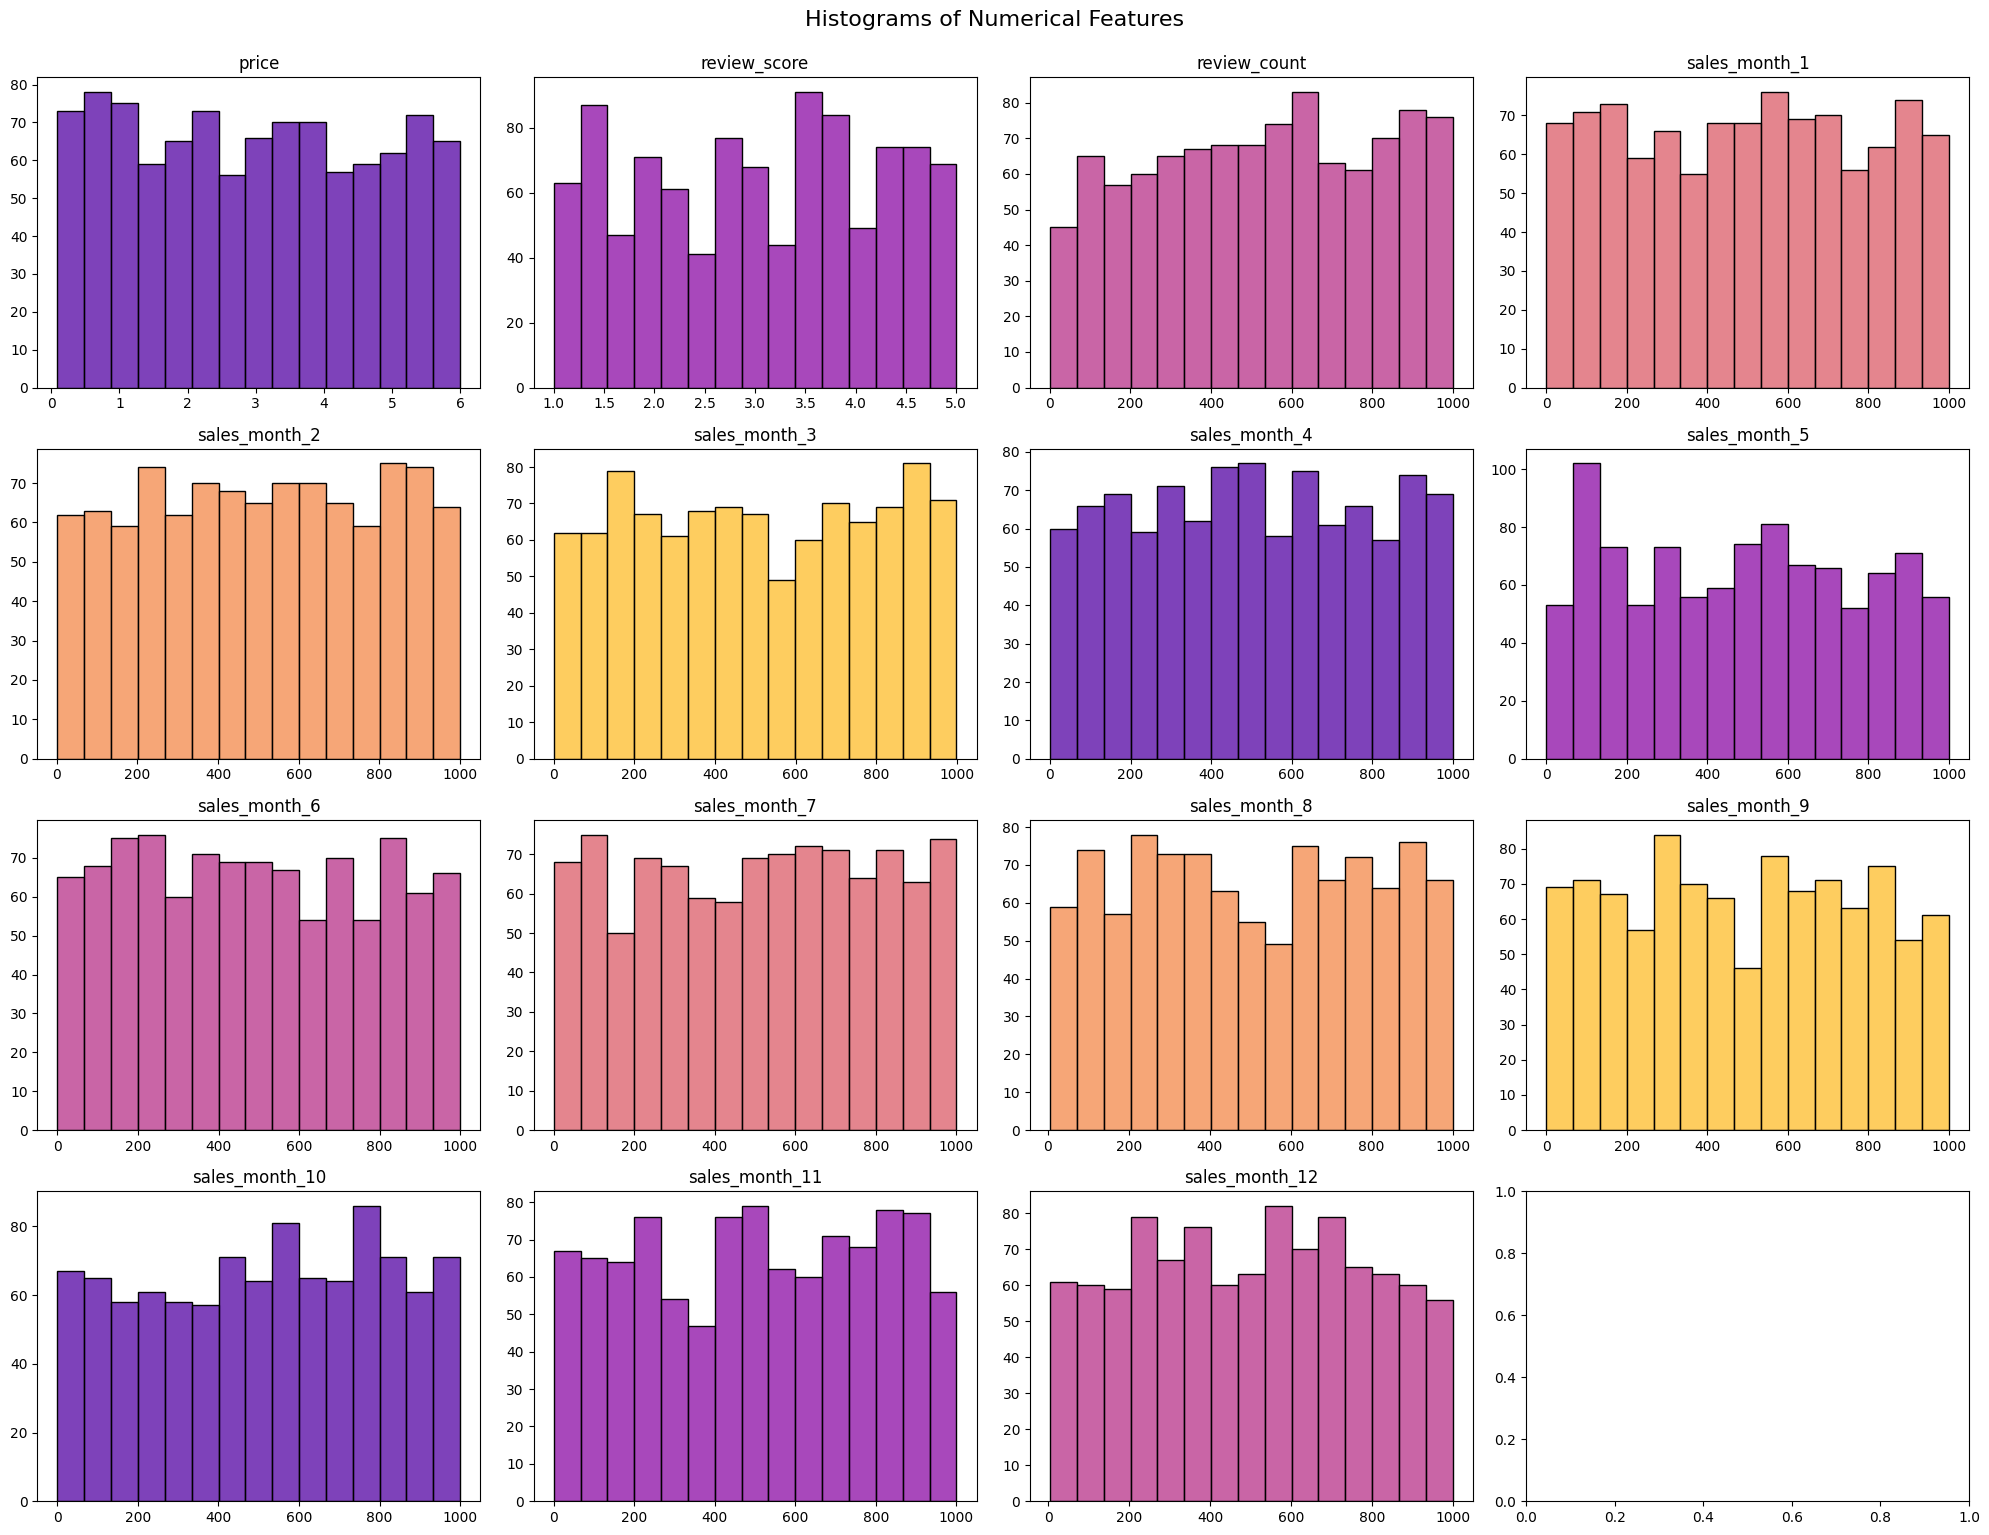

In [100]:
# List of numerical features
numerical_features = ['price', 'review_score', 'review_count'] + [f'sales_month_{i}' for i in range(1, 13)]

sns.set_palette("plasma")

# Plotting histograms
fig, axes = plt.subplots(4, 4, figsize=(20, 15))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], bins=15, kde=False, ax=axes[i], color=sns.color_palette("plasma")[i % len(sns.color_palette("plasma"))])
    axes[i].set_title(feature, fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.suptitle('Histograms of Numerical Features', fontsize=16, y=1.02)
plt.show()

# 3.2 Categorical Analysis

In [101]:
#Distribution of products across categories

In [102]:
category_counts = df['category'].value_counts()
category_percentages = (category_counts / len(df) * 100).round(2)
category_analysis = pd.DataFrame({
    'Count': category_counts,
    'Percentage': category_percentages
})

C:\Users\Admin\AppData\Local\Temp\ipykernel_5680\285273135.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




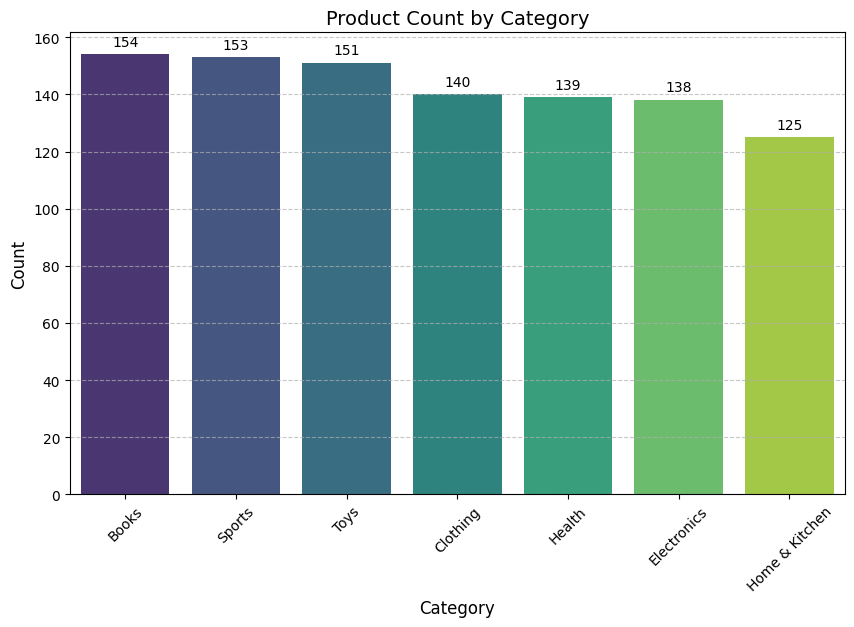

In [103]:
plt.figure(figsize=(10, 6))
sns.barplot(x=category_analysis.index, y=category_analysis['Count'], palette='viridis')
plt.title('Product Count by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(category_analysis['Count']):
    plt.text(index, value + 3, str(value), ha='center', fontsize=10)
plt.show()

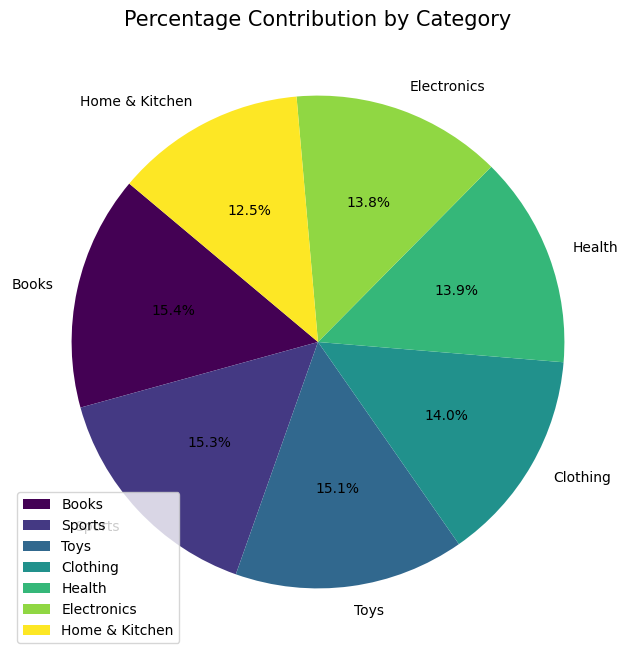

In [104]:
plt.figure(figsize=(8, 8))
category_analysis['Percentage'].plot.pie(autopct='%1.1f%%', startangle=140, cmap='viridis', ylabel='', legend=True)
plt.title('Percentage Contribution by Category', fontsize=15)
plt.show()

# 3.3 Top-selling categories and products based on total sales 

C:\Users\Admin\AppData\Local\Temp\ipykernel_5680\2006435440.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




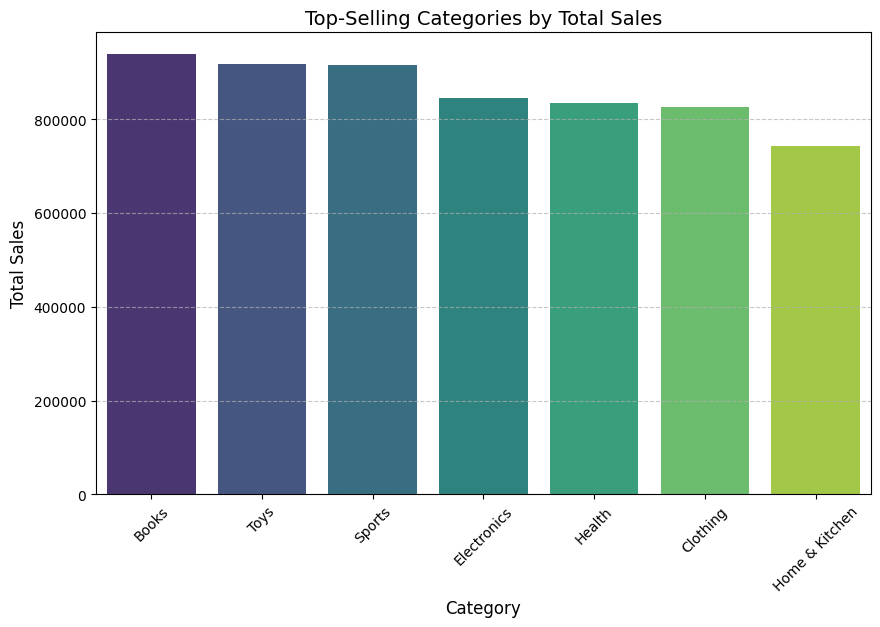

Top Categories by Total Sales:
category
Books             938229
Toys              917101
Sports            916371
Electronics       845120
Health            834414
Clothing          826536
Home & Kitchen    742141
Name: total_sales, dtype: int64

Top Products by Total Sales:
    product_name  total_sales
223  Product_224         9151
285  Product_286         8921
733  Product_734         8914
904  Product_905         8783
179  Product_180         8775
852  Product_853         8765
238  Product_239         8724
923  Product_924         8525
936  Product_937         8459
196  Product_197         8418


In [105]:
#total sales
df['total_sales'] = df[[f'sales_month_{i}' for i in range(1, 13)]].sum(axis=1)

#Top-selling categories
top_categories_sales = df.groupby('category')['total_sales'].sum().sort_values(ascending=False)

#Top-selling products
top_products_sales = df[['product_name', 'total_sales']].sort_values(by='total_sales', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories_sales.index, y=top_categories_sales.values, palette='viridis')
plt.title('Top-Selling Categories by Total Sales', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Top Categories by Total Sales:")
print(top_categories_sales)
print("\nTop Products by Total Sales:")
print(top_products_sales)


C:\Users\Admin\AppData\Local\Temp\ipykernel_5680\1581479490.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




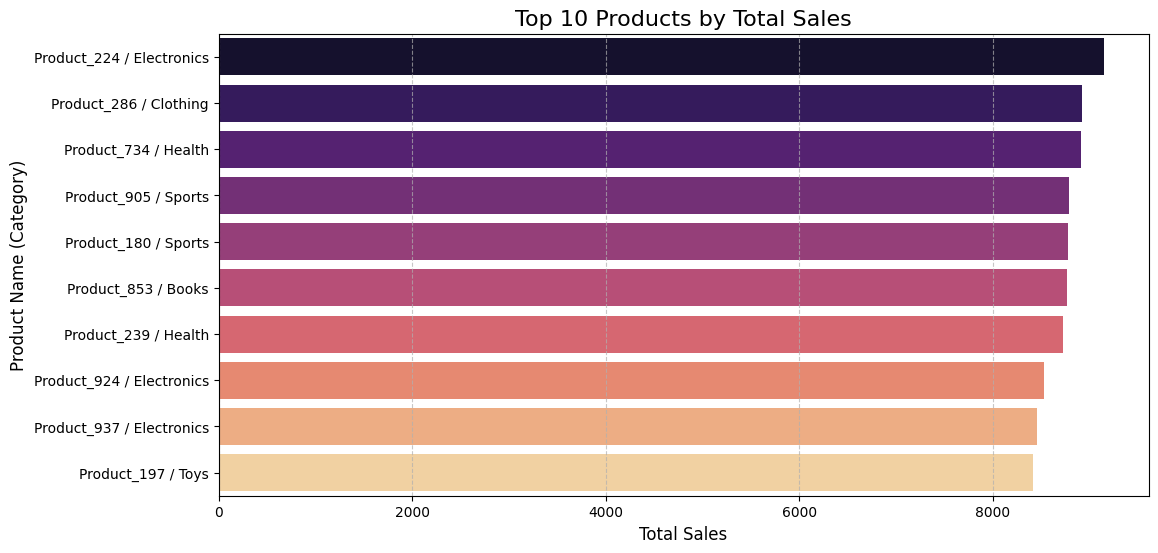

In [106]:
df['product_category'] = df['product_name'] + " / " + df['category']

# Select the top 10 products by total sales
top_products = df.nlargest(10, 'total_sales')

plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='product_category', data=top_products, palette='magma')
plt.title('Top 10 Products by Total Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product Name (Category)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 3.5 Sales Trend Analysis

In [107]:
all_category_monthly_sales= df.groupby('category').sum().loc[:, 'sales_month_1':'sales_month_12']
all_category_monthly_sales

,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
category,,,,,,,,,,,,
Books,77932,80079,76998,74699,79051,76644,79114,78108,77211,83504,76557,78332
Clothing,60966,67911,76796,70088,61643,63123,66105,74422,72675,68806,71683,72318
Electronics,76347,72472,70708,73158,72169,70060,72223,65754,69914,70148,68148,64019
Health,67644,67432,67602,72925,69178,63926,75256,69126,64581,72613,72500,71631
Home & Kitchen,57844,57252,62667,65388,59766,63169,60129,65042,58135,64876,66281,61592
Sports,77737,82244,75109,74287,73467,75641,77082,73912,79209,80187,74270,73226
Toys,79836,80271,76859,73278,71920,79090,77102,78205,70209,74664,76399,79268


In [108]:
month_sales = df.loc[:, 'sales_month_1':'sales_month_12'].sum()
month_sales.sort_values(ascending=False)

sales_month_10    514798
sales_month_2     507661
sales_month_7     507011
sales_month_3     506739
sales_month_11    505838
sales_month_8     504569
sales_month_4     503823
sales_month_12    500386
sales_month_1     498306
sales_month_9     491934
sales_month_6     491653
sales_month_5     487194
dtype: int64

In [109]:
print('Total sales for all categories in this year is:', month_sales.sum(),'Product for sale')


Total sales for all categories in this year is: 6019912 Product for sale


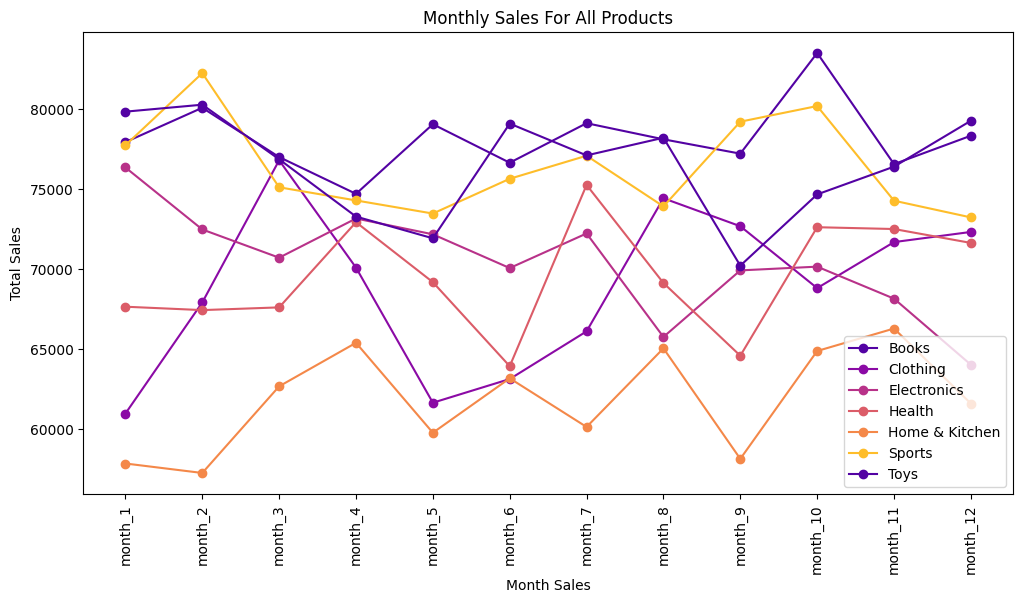

In [110]:
months=["month_1","month_2","month_3","month_4","month_5","month_6","month_7","month_8","month_9","month_10","month_11","month_12"] 

plt.figure(figsize=(12, 6))

for category in all_category_monthly_sales.index:
    plt.plot(months, all_category_monthly_sales.loc[category], marker='o', label=category)
plt.xlabel('Month Sales')
plt.ylabel('Total Sales')
plt.title('Monthly Sales For All Products')
plt.xticks(rotation=90)
plt.legend()
plt.show() 

In [111]:
monthly_sales = df.loc[:, 'sales_month_1':'sales_month_12'].sum().reset_index()
monthly_sales.columns = ['month', 'total_sales']
monthly_sales['month'] = monthly_sales['month'].apply(lambda x: x.split('_')[-1]).astype(int)

fig = px.line(monthly_sales, x='month', y='total_sales', title='Monthly Sales Trends',
              markers=True, line_shape='spline', color_discrete_sequence=px.colors.qualitative.Plotly)

fig.update_layout(
    title_font_size=20,
    xaxis_title="Month",
    yaxis_title="Total Sales",
    template="plotly_dark",
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()

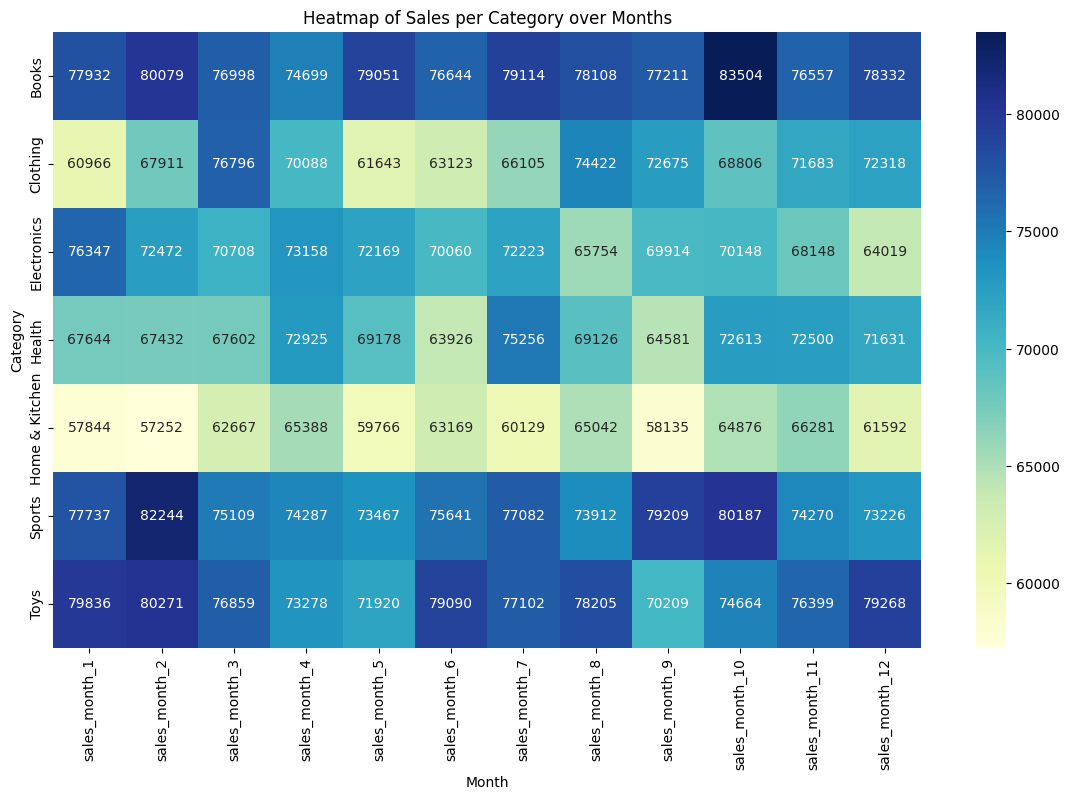

In [112]:
category_monthly_sales = df.groupby('category')[[f'sales_month_{i}' for i in range(1, 13)]].sum().reset_index()
category_monthly_sales.set_index('category', inplace=True)

plt.figure(figsize=(14, 8))
sns.heatmap(category_monthly_sales, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Sales per Category over Months')
plt.xlabel('Month')
plt.ylabel('Category')
plt.show()

# 3.6 Revenue

In [113]:
months=["month_1","month_2","month_3","month_4","month_5","month_6","month_7","month_8","month_9","month_10","month_11","month_12"] 


In [114]:
df['total_sales']=df.loc[:,'sales_month_1':'sales_month_12'].sum(axis=1)
df['total_revenue']=df['price']*df['total_sales']
df

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,...,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,total_sales,product_category,total_revenue
0,1,Product_1,Clothing,2.28,1.7,220,479,449,92,784,...,904,446,603,807,252,695,306,6421,Product_1 / Clothing,14639.88
1,2,Product_2,Home & Kitchen,5.71,3.2,903,21,989,861,863,...,128,610,436,176,294,772,353,6027,Product_2 / Home & Kitchen,34414.17
2,3,Product_3,Toys,4.41,4.5,163,348,558,567,143,...,409,290,828,340,667,267,392,5580,Product_3 / Toys,24607.80
3,4,Product_4,Toys,3.62,3.9,951,725,678,59,15,...,421,670,933,56,157,168,203,5022,Product_4 / Toys,18179.64
4,5,Product_5,Books,0.99,4.2,220,682,451,649,301,...,293,411,258,854,548,770,257,6094,Product_5 / Books,6033.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Product_996,Home & Kitchen,0.60,3.6,494,488,359,137,787,...,970,282,155,57,575,634,393,5515,Product_996 / Home & Kitchen,3309.00
996,997,Product_997,Home & Kitchen,5.51,4.8,701,18,906,129,78,...,110,403,683,104,858,729,474,4511,Product_997 / Home & Kitchen,24855.61
997,998,Product_998,Sports,0.87,1.3,287,725,109,193,657,...,337,664,476,265,344,888,654,5527,Product_998 / Sports,4808.49
998,999,Product_999,Sports,5.70,1.2,720,196,191,315,622,...,122,65,938,521,268,60,394,4546,Product_999 / Sports,25912.20


In [115]:
months = [
    "sales_month_1", "sales_month_2", "sales_month_3", "sales_month_4",
    "sales_month_5", "sales_month_6", "sales_month_7", "sales_month_8",
    "sales_month_9", "sales_month_10", "sales_month_11", "sales_month_12"
]

#add colum revenue for each months
for month in months:
    df[f"revenue_{month}"] = df[month]*df["price"]
df

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,...,revenue_sales_month_3,revenue_sales_month_4,revenue_sales_month_5,revenue_sales_month_6,revenue_sales_month_7,revenue_sales_month_8,revenue_sales_month_9,revenue_sales_month_10,revenue_sales_month_11,revenue_sales_month_12
0,1,Product_1,Clothing,2.28,1.7,220,479,449,92,784,...,209.76,1787.52,1377.12,2061.12,1016.88,1374.84,1839.96,574.56,1584.60,697.68
1,2,Product_2,Home & Kitchen,5.71,3.2,903,21,989,861,863,...,4916.31,4927.73,2992.04,730.88,3483.10,2489.56,1004.96,1678.74,4408.12,2015.63
2,3,Product_3,Toys,4.41,4.5,163,348,558,567,143,...,2500.47,630.63,3400.11,1803.69,1278.90,3651.48,1499.40,2941.47,1177.47,1728.72
3,4,Product_4,Toys,3.62,3.9,951,725,678,59,15,...,213.58,54.30,3391.94,1524.02,2425.40,3377.46,202.72,568.34,608.16,734.86
4,5,Product_5,Books,0.99,4.2,220,682,451,649,301,...,642.51,297.99,613.80,290.07,406.89,255.42,845.46,542.52,762.30,254.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Product_996,Home & Kitchen,0.60,3.6,494,488,359,137,787,...,82.20,472.20,406.80,582.00,169.20,93.00,34.20,345.00,380.40,235.80
996,997,Product_997,Home & Kitchen,5.51,4.8,701,18,906,129,78,...,710.79,429.78,104.69,606.10,2220.53,3763.33,573.04,4727.58,4016.79,2611.74
997,998,Product_998,Sports,0.87,1.3,287,725,109,193,657,...,167.91,571.59,187.05,293.19,577.68,414.12,230.55,299.28,772.56,568.98
998,999,Product_999,Sports,5.70,1.2,720,196,191,315,622,...,1795.50,3545.40,4867.80,695.40,370.50,5346.60,2969.70,1527.60,342.00,2245.80


- Total Revenue by Months

Monthly Revenue Breakdown:
January: $1,464,031.51
February: $1,507,383.71
March: $1,494,263.45
April: $1,519,603.11
May: $1,463,016.23
June: $1,435,476.22
July: $1,492,789.81
August: $1,476,974.64
September: $1,458,044.65
October: $1,549,245.19
November: $1,507,421.63
December: $1,496,445.98


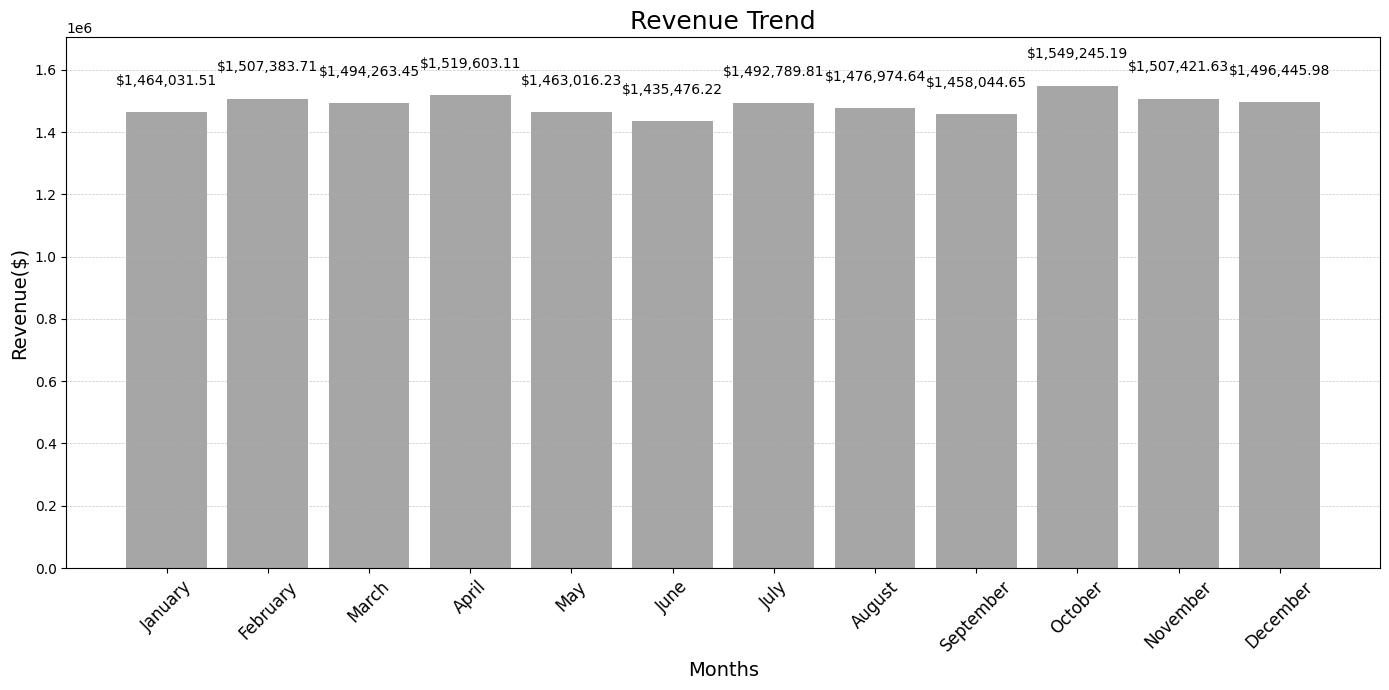

In [116]:

# Assuming a column 'price' exists
if "price" not in df.columns:
    raise ValueError("The dataset must include a 'price' column to calculate revenue.")

# Calculate each month
for month in months:
    df[f"revenue_{month}"] = df[month] * df["price"]

monthly_revenue_trend = df[[f"revenue_{month}" for month in months]].sum().reset_index()
monthly_revenue_trend.columns = ["month", "total_revenue"]

# Maping month 
month_mapping = {
    "revenue_sales_month_1": "January", "revenue_sales_month_2": "February",
    "revenue_sales_month_3": "March", "revenue_sales_month_4": "April",
    "revenue_sales_month_5": "May", "revenue_sales_month_6": "June",
    "revenue_sales_month_7": "July", "revenue_sales_month_8": "August",
    "revenue_sales_month_9": "September", "revenue_sales_month_10": "October",
    "revenue_sales_month_11": "November", "revenue_sales_month_12": "December"
}

monthly_revenue_trend["month"] = monthly_revenue_trend["month"].map(month_mapping)

print("Monthly Revenue Breakdown:")
for _, row in monthly_revenue_trend.iterrows():
    print(f"{row['month']}: ${row['total_revenue']:,.2f}")


month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
monthly_revenue_trend["month"] = pd.Categorical(
    monthly_revenue_trend["month"], categories=month_order, ordered=True
)
monthly_revenue_trend = monthly_revenue_trend.sort_values("month")


plt.figure(figsize=(14, 7))
bars = plt.bar(
    monthly_revenue_trend["month"], monthly_revenue_trend["total_revenue"], color="gray", alpha=0.7
)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.05 * max(monthly_revenue_trend["total_revenue"]),
        f"${height:,.2f}",
        ha="center",
        va="bottom",
        fontsize=10
    )
# Customing
plt.title("Revenue Trend", fontsize=18)
plt.xlabel("Months", fontsize=14)
plt.ylabel("Revenue($)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.ylim(0, max(monthly_revenue_trend["total_revenue"]) * 1.1)
plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

In [117]:
#total Revenue by Category
total_revenue=df.groupby('category')['total_revenue'].sum().sort_values(ascending=False)
total_revenue

category
Books             2841381.52
Sports            2791682.20
Toys              2763117.42
Health            2660994.01
Electronics       2419926.78
Clothing          2247049.19
Home & Kitchen    2140545.01
Name: total_revenue, dtype: float64

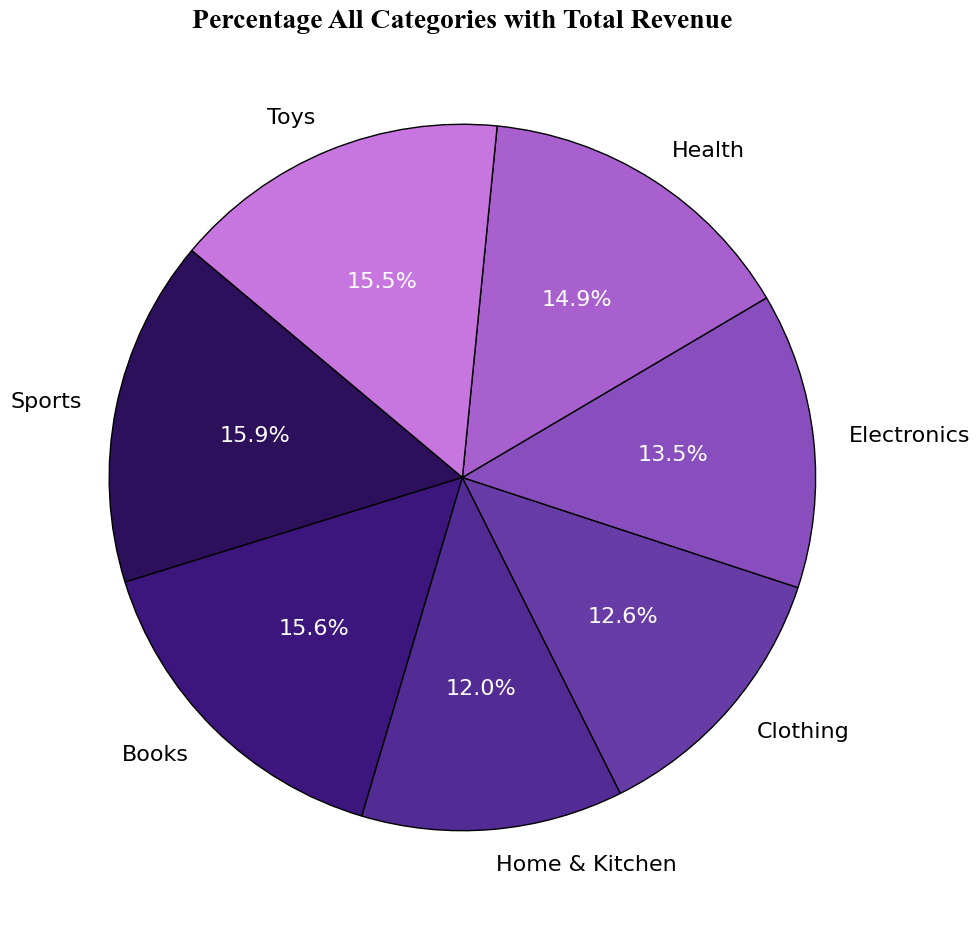

In [118]:
categories = ["Sports", "Books", "Home & Kitchen", "Clothing", "Electronics", "Health", "Toys"]
total_revenue = [2841381.52, 2791682.20, 2140545.01, 2247049.19, 2419926.78, 2669994.01, 2763117.42]
colors = ["#2C105C", "#3C167D", "#522B95", "#683CA6", "#884EBE", "#A860CF", "#C775DF"]

#set color to white
def make_autopct(values):
    def custom_autopct(pct):
        return f"{pct:.1f}%" if pct > 0 else ""
    return custom_autopct

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    total_revenue,
    labels=categories,
    autopct=make_autopct(total_revenue),  
    colors=colors,
    startangle=140,
    wedgeprops={"edgecolor": "black", "linewidth": 1},
    textprops={"fontsize": 16},  
)
for autotext in autotexts:
    autotext.set_color("white")
plt.title(
    "Percentage All Categories with Total Revenue",
    fontsize=20,
    fontweight="bold",
    fontname="Times New Roman"
)
plt.tight_layout()
plt.show()


# 3.7 Customer Satisfaction

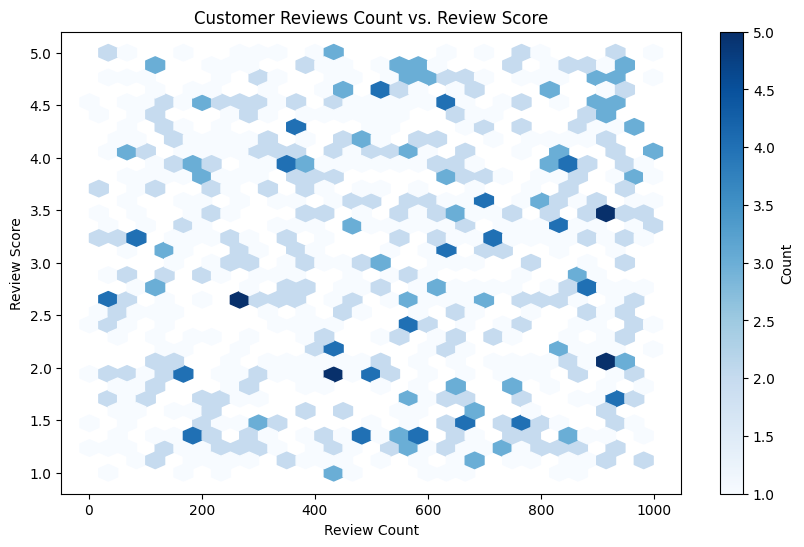

In [119]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['review_count'], df['review_score'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count')
plt.title('Customer Reviews Count vs. Review Score')
plt.xlabel('Review Count')
plt.ylabel('Review Score')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5680\289117659.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Admin\AppData\Local\Temp\ipykernel_5680\289117659.py:2: FutureWarning:



The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.



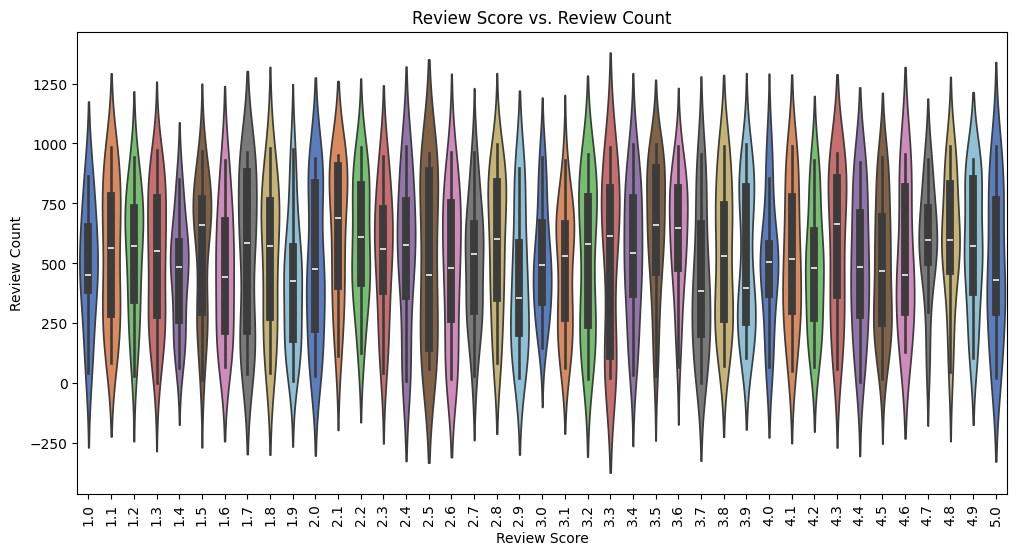

In [120]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='review_score', y='review_count', data=df, scale='width', palette='muted')
plt.title('Review Score vs. Review Count')
plt.xlabel('Review Score')
plt.ylabel('Review Count')
plt.xticks(rotation=90)
plt.show()


- Average Review Score by Category

In [121]:
category_reviews = df.groupby('category').agg({
    'review_score': 'mean',
    'review_count': 'sum'
}).sort_values(by='review_score', ascending=False).reset_index()

# Plotting
fig = px.bar(category_reviews, x='category', y='review_score',
             title='Average Review Score by Category',
             color='review_score', color_continuous_scale='Blues',  #color palette
             text='review_score')  # Add text labels

fig.update_layout(
    title_font_size=24,  # font size
    xaxis_title="Category",
    yaxis_title="Average Review Score",
    xaxis_tickangle=-45,  # Rotate x-axis labels
    template="plotly_white",  # Light background
    plot_bgcolor='rgba(255,255,255,0.9)',  # Slightly off-white plot background
    paper_bgcolor='rgba(245,245,245,1)',  # Light gray paper background
    xaxis=dict(showgrid=True, gridcolor='rgba(200,200,200,0.5)', linecolor='black', linewidth=2),
    yaxis=dict(showgrid=True, gridcolor='rgba(200,200,200,0.5)', linecolor='black', linewidth=2),
    font=dict(family="Arial", size=20, color="black"),
    margin=dict(l=70, r=50, b=140, t=120, pad=4),  # Adjust margins
    width=1000,  # Width 
    height=700   # Height 
)

fig.update_traces(texttemplate='%{text:.2f}', textfont_size=14, textposition='outside')  # Format text labels
fig.show()

- Total Review Count by Category

In [122]:
fig = px.bar(category_reviews, x='category', y='review_count',
             title='Total Review Count by Category',
             color='review_count', color_continuous_scale='Blues', 
             text='review_count')
fig.update_layout(
    title_font_size=24,  
    xaxis_title="Category",
    yaxis_title="Total Review Count",
    xaxis_tickangle=-45,  
    template="plotly_white",  
    plot_bgcolor='rgba(255,255,255,0.9)',  
    paper_bgcolor='rgba(245,245,245,1)',  
    xaxis=dict(showgrid=True, gridcolor='rgba(200,200,200,0.5)', linecolor='black', linewidth=2),
    yaxis=dict(showgrid=True, gridcolor='rgba(200,200,200,0.5)', linecolor='black', linewidth=2),
    font=dict(family="Arial", size=16, color="black"),
    margin=dict(l=70, r=50, b=140, t=120, pad=4),  
    width=1000,  
    height=700   )
fig.update_traces(texttemplate='%{text:.0f}', textfont_size=14, textposition='outside')  
fig.show()

- Pricing Impact on Sales and Customer Reviews

In [123]:
# Scatter plot: price vs. total_sales with Viridis color palette
fig = px.scatter(df, x='price', y='total_sales', color='category', title='Price vs. Total Sales',
                 color_continuous_scale='Viridis')

fig.update_layout(
    title_font_size=20,
    xaxis_title="Price",
    yaxis_title="Total Sales",
    template="plotly_dark"
)

fig.show()

In [124]:
# Scatter plot: price vs. review_score with Viridis color palette
fig = px.scatter(df, x='price', y='review_score', color='category', title='Price vs. Review Score',
                 color_continuous_scale='Viridis')

fig.update_layout(
    title_font_size=20,
    xaxis_title="Price",
    yaxis_title="Review Score",
    template="plotly_dark"
)

fig.show()

# 4. Machine Learning

## PrepareData

In [125]:
# Calculate total sales
monthly_sales_columns = [f'sales_month_{i}' for i in range(1, 13)]
df['total_sales'] = df[monthly_sales_columns].sum(axis=1)

# Define thresholds for sales categories
low_threshold = df['total_sales'].quantile(0.25)
high_threshold = df['total_sales'].quantile(0.75)

# Categorize products into 'Low', 'Medium', 'High'
def categorize_sales(total_sales):
    if total_sales < low_threshold:
        return 'Low'
    elif total_sales < high_threshold:
        return 'Medium'
    else:
        return 'High'

df['sales_category'] = df['total_sales'].apply(categorize_sales)

# Select features and target for regression
X_reg = df[['price', 'review_score', 'review_count']]
y_reg = df['total_sales']

# Split the df into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


## 4.1 Linear Regression for Predicting Sales

# Train and Evaluate Model

In [126]:
# Train Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = reg_model.predict(X_test_reg)

# Evaluate the model
print("Mean Absolute Error:", mean_absolute_error(y_test_reg, y_pred_reg))
print("R² Score:", r2_score(y_test_reg, y_pred_reg))


Mean Absolute Error: 773.7059989492121
R² Score: -0.004372192951524356


## 4.2 Classification for Sales Categories

### Data Preparetion

In [127]:
# Select features and target for classification
X_clf = df[['price', 'review_score', 'review_count']]
y_clf = df['sales_category']

# Split the df into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)


### Train and Evaluate Model

In [128]:
# Train Random Forest Classifier
clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

# Make predictions
y_pred_clf = clf_model.predict(X_test_clf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
print("\nClassification Report:\n", classification_report(y_test_clf, y_pred_clf))


Accuracy: 0.41

Classification Report:
               precision    recall  f1-score   support

        High       0.17      0.18      0.17        45
         Low       0.23      0.10      0.14        52
      Medium       0.53      0.67      0.59       103

    accuracy                           0.41       200
   macro avg       0.31      0.31      0.30       200
weighted avg       0.37      0.41      0.38       200



## 4.3 Visualization

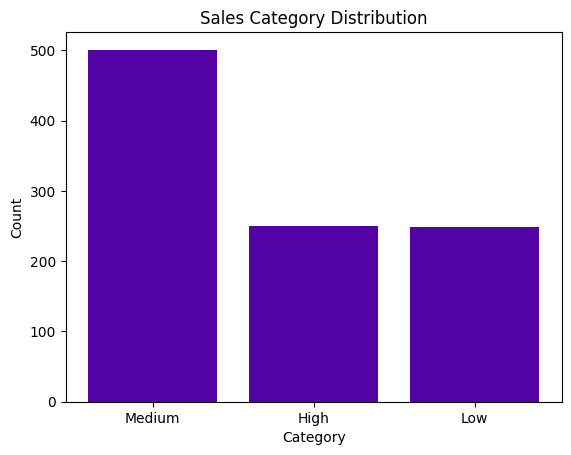

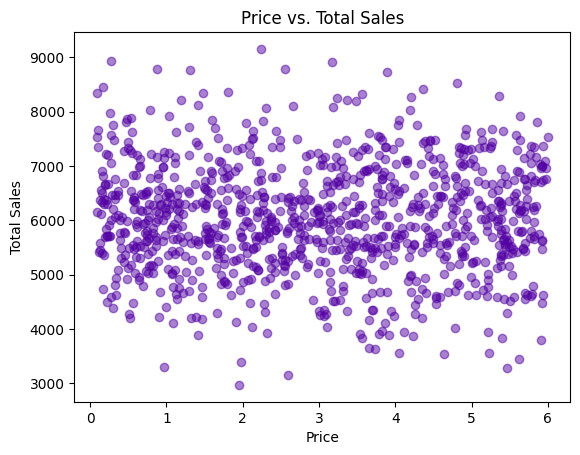

In [129]:
# Bar chart for sales categories
category_counts = df['sales_category'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.title("Sales Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

# Scatter plot for price vs. total sales
plt.scatter(df['price'], df['total_sales'], alpha=0.5)
plt.title("Price vs. Total Sales")
plt.xlabel("Price")
plt.ylabel("Total Sales")
plt.show()
